In [36]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
df_VWCE=pd.read_csv('VWCE_ETF_Stock_Price.csv')
df_SP500=pd.read_csv('S&P_500_Data.csv')
df_APPLE=pd.read_csv('Apple_Stock_Price.csv')
df_MSCI=pd.read_csv('MSCI.csv')
df_EIMI=pd.read_csv("Eimi.csv")
sns.set(style="darkgrid")

In [37]:
df_VWCE

,Date,Price,Open,High,Low,Vol.,Change %
0,02/01/2025,135.49,137.36,140.18,135.16,89.46K,-2.43%
1,01/01/2025,138.87,134.30,139.28,132.96,109.06K,3.10%
2,12/01/2024,134.70,135.00,136.97,131.40,76.97K,0.11%
3,11/01/2024,134.54,126.24,135.69,126.20,89.67K,6.60%
4,10/01/2024,126.21,125.88,130.18,124.96,43.35K,0.80%
5,09/01/2024,125.21,123.53,126.31,118.80,36.27K,1.75%
6,08/01/2024,123.05,123.65,124.90,111.84,57.92K,-0.35%
7,07/01/2024,123.48,122.72,125.26,120.23,49.70K,0.31%
8,06/01/2024,123.10,119.40,123.75,117.82,32.74K,4.74%
9,05/01/2024,117.53,115.76,120.53,115.50,66.84K,0.80%


In [38]:
df_VWCE['Date']=pd.to_datetime(df_VWCE['Date'])
df_VWCE_ordered=df_VWCE.sort_values(by='Date', ascending=True).copy()
df_SP500['Date']=pd.to_datetime(df_SP500['Date'])
df_SP500_ordered=df_SP500.sort_values(by='Date', ascending=True).copy()
df_MSCI['Date']=pd.to_datetime(df_MSCI['Date'])
df_MSCI_ordered=df_MSCI.sort_values(by='Date', ascending=True).copy()
df_EIMI['Date']=pd.to_datetime(df_EIMI['Date'])
df_EIMI_ordered=df_EIMI.sort_values(by='Date', ascending=True).copy()


In [39]:
df_VWCE_ordered.set_index('Date', inplace=True)
df_SP500_ordered.set_index('Date', inplace=True)
df_MSCI_ordered.set_index('Date', inplace=True)
df_EIMI_ordered.set_index('Date', inplace=True)

<Axes: xlabel='Date'>

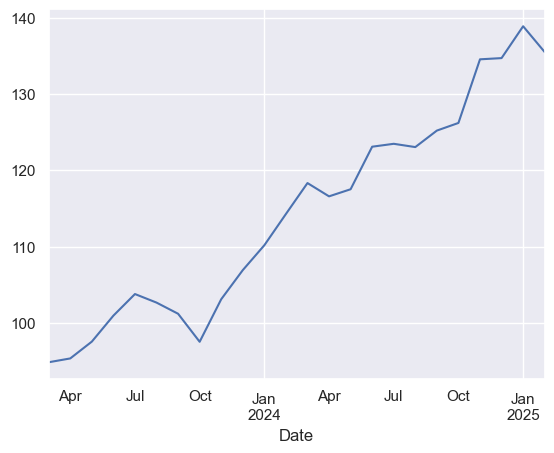

In [40]:
df_VWCE_ordered['Price'].plot(kind='line')

In [41]:
df_VWCE_ordered.describe()

,Price,Open,High,Low
count,24.000000,24.000000,24.000000,24.000000
mean,114.407917,112.968333,116.129167,110.477083
std,13.976924,13.546724,14.149734,13.430873
min,94.880000,95.210000,96.550000,91.160000
25%,102.325000,101.417500,103.725000,98.540000
50%,115.445000,112.575000,116.620000,110.755000
75%,123.912500,123.560000,125.522500,119.157500
max,138.870000,137.360000,140.180000,135.160000


In [42]:
df_VWCE_ordered.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2023-03-01 to 2025-02-01
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     24 non-null     float64
 1   Open      24 non-null     float64
 2   High      24 non-null     float64
 3   Low       24 non-null     float64
 4   Vol.      24 non-null     object 
 5   Change %  24 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.3+ KB


In [43]:
df_VWCE_ordered['Change %'] = df_VWCE_ordered['Change %'].replace('%', '', regex=True)  # Remove %
df_VWCE_ordered['Change %'] = df_VWCE_ordered['Change %'].astype(float)  
df_SP500_ordered['Change %'] = df_SP500_ordered['Change %'].replace('%', '', regex=True)  # Remove %
df_SP500_ordered['Change %'] = df_SP500_ordered['Change %'].astype(float)
df_MSCI_ordered['Change %'] = df_MSCI_ordered['Change %'].replace('%', '', regex=True)  # Remove %
df_MSCI_ordered['Change %'] = df_MSCI_ordered['Change %'].astype(float)
df_EIMI_ordered['Change %'] = df_EIMI_ordered['Change %'].replace('%', '', regex=True)  # Remove %
df_EIMI_ordered['Change %'] = df_EIMI_ordered['Change %'].astype(float)

In [44]:
df_VWCE_ordered

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-03-01,94.88,95.21,96.76,91.16,6.55K,-0.23
2023-04-01,95.38,95.79,96.55,93.75,14.51K,0.52
2023-05-01,97.58,95.98,99.00,93.95,8.91K,2.32
2023-06-01,100.98,98.04,102.02,97.94,10.30K,3.48
2023-07-01,103.81,101.52,103.80,98.90,14.93K,2.80
2023-08-01,102.69,103.97,104.04,98.74,16.47K,-1.08
2023-09-01,101.23,102.63,104.74,100.50,13.49K,-1.43
2023-10-01,97.56,101.11,102.53,96.82,20.21K,-3.62
2023-11-01,103.13,97.98,103.50,97.90,14.61K,5.72


In [45]:
print(df_VWCE_ordered['Change %'].idxmin())

2023-10-01 00:00:00


In [46]:
print(df_VWCE_ordered['Change %'].idxmax())

2024-11-01 00:00:00


In [47]:
df_VWCE_sorted=df_VWCE_ordered.sort_values(by='Change %', ascending=True)

In [48]:
# The Sp500 CSV uses ',' as separator, i need to replace it as i want a float value
columns_to_edit = ['Price', 'Open', 'High', 'Low']
for col in columns_to_edit:
    df_SP500_ordered[col] = df_SP500_ordered[col].str.replace(',', '').astype(float)

In [49]:
df_VWCE_sorted['Change %'].head()
#The worst time of the year for stock market seems to be from summer to the begin of october

Date
2023-10-01   -3.62
2025-02-01   -2.43
2024-04-01   -1.47
2023-09-01   -1.43
2023-08-01   -1.08
Name: Change %, dtype: float64

In [50]:
df_VWCE_sorted['Change %'].tail()
#The best time of the year for stock market seems to be from october to february

Date
2023-12-01    3.69
2024-02-01    3.71
2024-06-01    4.74
2023-11-01    5.72
2024-11-01    6.60
Name: Change %, dtype: float64

In [51]:
#Check correlation between VWCE and Sp500
df_VWCE_ordered['Price'].corr(df_SP500_ordered['Price'])

np.float64(0.989953876314216)

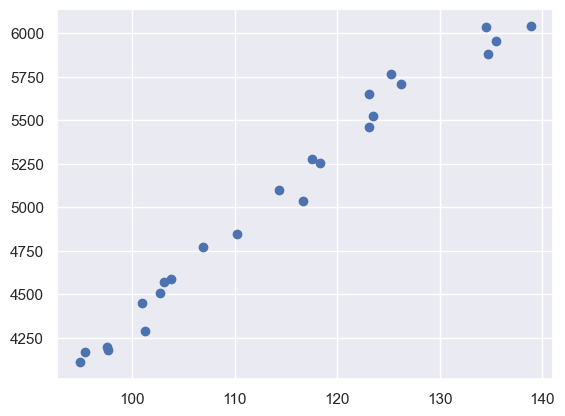

In [52]:
plt.scatter(df_VWCE_ordered['Price'], df_SP500_ordered['Price'])
#As the result of the concentration of US stocks in FTSE-All World, we can see a nearly perfect positive correlation

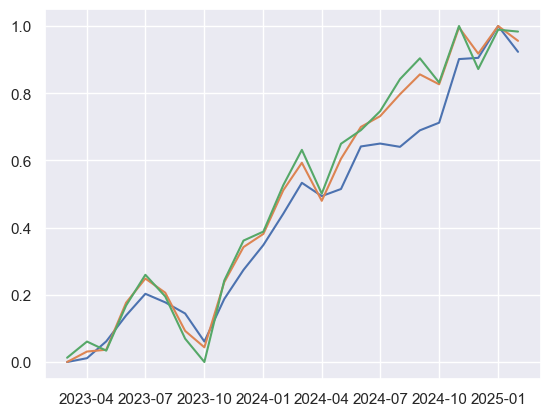

In [53]:
#As i want to plot VWCE and SP500 in the same graphic to compare their performance, i need to normalize their values because they are too far
scaler=MinMaxScaler()
df_VWCE_ordered['Normalized Price']=scaler.fit_transform(df_VWCE_ordered[['Price']])
df_SP500_ordered['Normalized Price']=scaler.fit_transform(df_SP500_ordered[['Price']])
df_MSCI_ordered['Normalized Price']=scaler.fit_transform(df_MSCI_ordered[['Price']])
df_EIMI_ordered['Normalized Price']=scaler.fit_transform(df_EIMI_ordered[['Price']])
plt.plot(df_VWCE_ordered.index, df_VWCE_ordered['Normalized Price'])
plt.plot(df_SP500_ordered.index, df_SP500_ordered['Normalized Price'])
plt.plot(df_MSCI_ordered.index, df_MSCI_ordered['Normalized Price'])
plt.show()

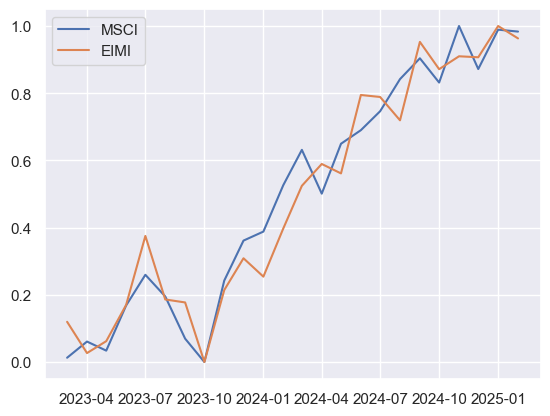

In [54]:
#Looking at emerging markets and developed markets correlation: they are very correlated but EIMI has more volatility.
#  Are we really diversifing? The rule is to invest in different countries, but what if they move the same?

plt.plot(df_MSCI_ordered.index, df_MSCI_ordered['Normalized Price'], label="MSCI")
plt.plot(df_EIMI_ordered.index, df_EIMI_ordered['Normalized Price'], label="EIMI")
plt.legend()
plt.show()

In [55]:
#We can also check the correlation between indexes with a heat map. First of all create a new dataframe using merge on indexe (the date)

df_MSCI_ordered = df_MSCI_ordered.rename(columns={'Normalized Price': 'Normalized Price_MSCI'})
df_merged = df_VWCE_ordered[['Normalized Price']].merge(df_SP500_ordered[['Normalized Price']], left_index=True, right_index=True, suffixes=('_VWCE', '_SP500'))
df_merged = df_merged.merge(df_MSCI_ordered[['Normalized Price_MSCI']], left_index=True, right_index=True)

df_MSCI_ordered = df_MSCI_ordered.rename(columns={'Price': 'Price_MSCI'})
df_merged2 = df_VWCE_ordered[['Price']].merge(df_SP500_ordered[['Price']], left_index=True, right_index=True, suffixes=('_VWCE', '_SP500'))
df_merged2 = df_merged2.merge(df_MSCI_ordered[['Price_MSCI']], left_index=True, right_index=True)

In [56]:
df_merged

,Normalized Price_VWCE,Normalized Price_SP500,Normalized Price_MSCI
Date,,,
2023-03-01,0.000000,0.000000,0.012719
2023-04-01,0.011366,0.031156,0.060868
2023-05-01,0.061378,0.036516,0.033841
2023-06-01,0.138668,0.176609,0.168294
2023-07-01,0.203001,0.248366,0.259596
2023-08-01,0.177540,0.206269,0.195094
2023-09-01,0.144351,0.092553,0.069498
2023-10-01,0.060923,0.043750,0.000000
2023-11-01,0.187543,0.237410,0.242335


<Axes: >

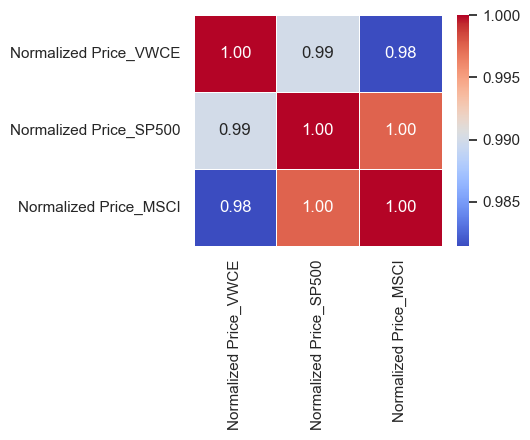

In [57]:
#Heat map confirms the correlation between indexes

corr_matrix = df_merged[['Normalized Price_VWCE', 'Normalized Price_SP500', 'Normalized Price_MSCI']].corr()
plt.figure(figsize=(4, 3)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

In [58]:
df_APPLE['Date']=pd.to_datetime(df_APPLE['Date'])
df_APPLE_ordered=df_APPLE.sort_values(by='Date', ascending=True).copy()

In [59]:
df_APPLE_ordered.set_index('Date', inplace=True)

In [60]:
#Now i want to see if the APPLE stocks matches the indexes
df_APPLE_ordered['Normalized Price']=scaler.fit_transform(df_APPLE_ordered[['Price']])

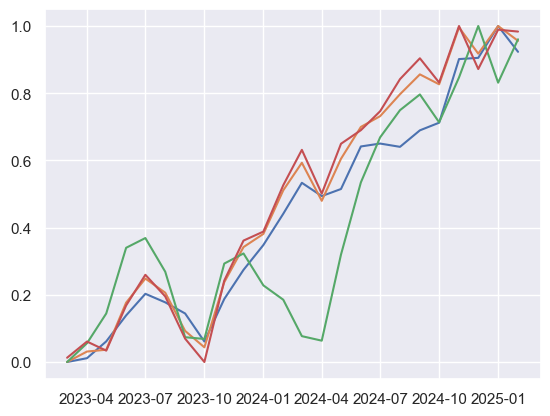

In [61]:
plt.plot(df_VWCE_ordered.index, df_VWCE_ordered['Normalized Price'])
plt.plot(df_SP500_ordered.index, df_SP500_ordered['Normalized Price'])
plt.plot(df_APPLE_ordered.index, df_APPLE_ordered['Normalized Price'])
plt.plot(df_MSCI_ordered.index, df_MSCI_ordered['Normalized Price_MSCI'])
plt.show()

#The graphic shows Apple matches the index most of the time, with highter volatily. The stocks clearly suffers (and enjoys, depend of the result) the quarterly earnings.

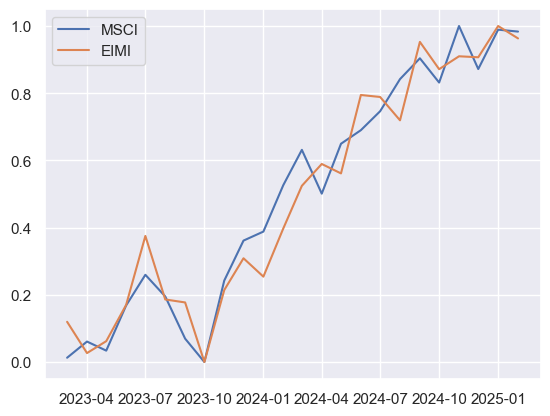

In [62]:
#Looking at emerging markets and developed markets correlation: they are very correlated but EIMI has more volatility. Are we really diversifing?

plt.plot(df_MSCI_ordered.index, df_MSCI_ordered['Normalized Price_MSCI'], label="MSCI")
plt.plot(df_EIMI_ordered.index, df_EIMI_ordered['Normalized Price'], label="EIMI")
plt.legend()
plt.show()

In [63]:
#Let's verify the volatily of indexes and apple stocks. The best way is to use the standard deviations of the Change % 
df_APPLE_ordered['Change %'] = df_APPLE_ordered['Change %'].replace('%', '', regex=True)  # Remove %
df_APPLE_ordered['Change %'] = df_APPLE_ordered['Change %'].astype(float)

VWCE_volatility = df_VWCE_ordered['Change %'].std()
SP500_volatility = df_SP500_ordered['Change %'].std()
APPLE_volatility = df_APPLE_ordered['Change %'].std()
MSCI_volatility = df_MSCI_ordered['Change %'].std()

In [64]:
print(VWCE_volatility,MSCI_volatility,SP500_volatility,APPLE_volatility)
#We can clearly see the volatily of the apple stock is more than the double of VWCE ande almost double of SP500/MSCI. This happens beacuse the all world ETF is less concentrated in big tech stocks
#VWCE has less returns but also less volatility, resulting a good product for risk-averse people.

2.6114534517074555 3.3843090350805043 3.4495298723999634 5.978018611692266


Slope (m): [0.02314819]
Intercept (b): 22.011603697089114
(R^2): 0.9950997180320206


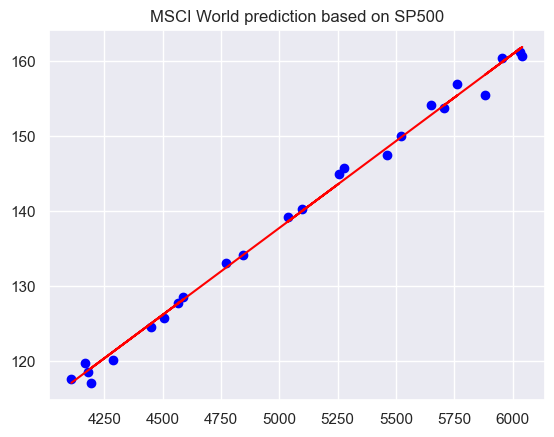

In [65]:
#Let's doing some prediction using a linear regression. We can predict the MSCI world price using the SP500's one.

x = df_SP500_ordered[['Price']]  
y = df_MSCI_ordered['Price_MSCI']   

model = LinearRegression()
model.fit(x, y)
print(f"Slope (m): {model.coef_}")
print(f"Intercept (b): {model.intercept_}")

y_pred = model.predict(x)

r2_score = model.score(x, y)
print(f"(R^2): {r2_score}")
plt.scatter(x, y, color='blue', label='Data') 
plt.plot(x, y_pred, color='red', label='Regression')
plt.title('MSCI World prediction based on SP500')
plt.show()

In [66]:
new_sp500_price = 5770  # new SP500 price
predicted_msc_price = model.coef_ * new_sp500_price + model.intercept_
print(f"Predicted price for MSCI World = {new_sp500_price} è: {predicted_msc_price}")

Predicted price for MSCI World = 5770 è: [155.57665108]


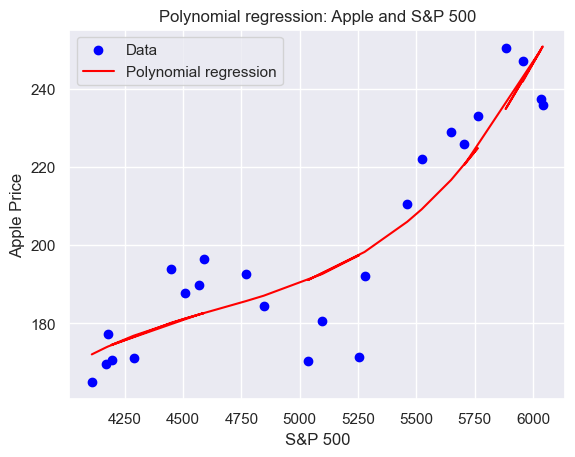

In [67]:
#A prediction of Apple stock based on the price of SP500 can be made with a polynomial regression

x = df_SP500_ordered['Price'].values.reshape(-1, 1)
y = df_APPLE_ordered['Price'].values
poly = PolynomialFeatures(degree=3)

x_poly = poly.fit_transform(x)

model_poly = LinearRegression()
model_poly.fit(x_poly, y)

y_poly_pred = model_poly.predict(x_poly)


plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, y_poly_pred, color='red', label='Polynomial regression')
plt.xlabel('S&P 500')
plt.ylabel('Apple Price')
plt.title('Polynomial regression: Apple and S&P 500')
plt.legend()
plt.show()

In [68]:
new_sp500 = np.array([5770]).reshape(-1, 1)
new_sp500_poly = poly.transform(new_sp500)
predicted_apple_price = model_poly.predict(new_sp500_poly)
print(predicted_apple_price)

[225.44756135]


In [75]:
#Some deep learning: MLP

X = df_merged2[['Price_VWCE', 'Price_SP500']].values  # Input
y = df_merged2['Price_MSCI'].values  # Target 

# Convert to tensor
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Target deve essere una colonna

class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(2, 64)  #input
        self.fc2 = nn.Linear(64, 32)  #hidden layer
        self.fc3 = nn.Linear(32, 1)   # Un output

    def forward(self, x):
        x = torch.relu(self.fc1(x)) 
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
model = SimpleModel()

# Loss and optimization function
criterion = nn.MSELoss() 
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training
epochs = 500

for epoch in range(epochs):
    model.train()
    
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    # Backpropagation and optiomization
    optimizer.zero_grad()  
    loss.backward()  
    optimizer.step() 

    if (epoch + 1) % 100 == 0:  # print loss value
        print(f'Epoca [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

prezzo1_input = 130.6
prezzo2_input = 5776.25


input_data = torch.tensor([[prezzo1_input, prezzo2_input]], dtype=torch.float32)

#prediction
model.eval() 
predizione = model(input_data)

print(f"Predizione: {predizione.item():.2f}")

Epoca [100/500], Loss: 9.6449
Epoca [200/500], Loss: 9.5851
Epoca [300/500], Loss: 9.5689
Epoca [400/500], Loss: 9.5494
Epoca [500/500], Loss: 9.5268
Predizione: 158.45


In [ ]:
#LSTM: neural network for time series prediction

def create_sequence(df, window_size):
    X, y = [], []
    for i in range(window_size, len(df)):
        X.append(df[i-window_size:i, :])  # previous data, window
        y.append(df[i, :])  # future value
    return np.array(X), np.array(y)

data = df_merged2[['Price_VWCE', 'Price_SP500', 'Price_MSCI']].values

# data normalizayion
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

window_size = 6
X, y = create_sequence(data_scaled, window_size)

# training and test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Convert to tensor
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)


class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_layer_size, batch_first=True)
        self.fc = nn.Linear(hidden_layer_size, output_size)

    def forward(self, x):
        out, (hn, cn) = self.lstm(x)
        out = self.fc(out[:, -1, :]) 
        return out

# Parameters
input_size = 3  # (prices of VWCE, SP500, MSCI)
hidden_layer_size = 64
output_size = 3  # (future prices for VWCE, SP500, MSCI)

# Create LSTM model
model = LSTMModel(input_size, hidden_layer_size, output_size)

# Loss and optimization function
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f"Epoca {epoch+1}/{epochs}, Loss: {loss.item()}")

# Prediction
model.eval()
with torch.no_grad():
    predictions = model(X_test)

# back to values from normalized
predictions = scaler.inverse_transform(predictions.numpy())
y_test = scaler.inverse_transform(y_test.numpy())

# Print expected and predicted values
for i in range(len(predictions)):
    print(f"Predizione {i+1}:")
    print(f"  Predicted value: VWCE={predictions[i][0]:.2f}, SP500={predictions[i][1]:.2f}, MSCI={predictions[i][2]:.2f}")
    print(f"  Expected value: VWCE={y_test[i][0]:.2f}, SP500={y_test[i][1]:.2f}, MSCI={y_test[i][2]:.2f}")

last_window = data_scaled[-window_size:]  # window
last_window = torch.tensor(last_window, dtype=torch.float32).unsqueeze(0)  # batch

model.eval()
with torch.no_grad():
    future_prediction = model(last_window)

future_prediction = scaler.inverse_transform(future_prediction.numpy())

# Predict March
print("\nPrevisione per il mese successivo (March 2025):")
print(f"  Previsione: VWCE={future_prediction[0][0]:.2f}, SP500={future_prediction[0][1]:.2f}, MSCI={future_prediction[0][2]:.2f}")

Epoca 100/1000, Loss: 0.0120313111692667
Epoca 200/1000, Loss: 0.010863231495022774
Epoca 300/1000, Loss: 0.008328406140208244
Epoca 400/1000, Loss: 0.004456541035324335
Epoca 500/1000, Loss: 0.003009882988408208
Epoca 600/1000, Loss: 0.001002199249342084
Epoca 700/1000, Loss: 0.00048082516877911985
Epoca 800/1000, Loss: 0.00038620474515482783
Epoca 900/1000, Loss: 0.00033176186843775213
Epoca 1000/1000, Loss: 0.00030735740438103676
Predizione 1:
  Predicted value: VWCE=126.77, SP500=5802.81, MSCI=157.12
  Expected value: VWCE=134.54, SP500=6032.38, MSCI=161.14
Predizione 2:
  Predicted value: VWCE=128.59, SP500=5907.08, MSCI=159.69
  Expected value: VWCE=134.70, SP500=5881.63, MSCI=155.50
Predizione 3:
  Predicted value: VWCE=128.76, SP500=5923.59, MSCI=160.18
  Expected value: VWCE=138.87, SP500=6040.53, MSCI=160.66
Predizione 4:
  Predicted value: VWCE=129.96, SP500=5998.14, MSCI=161.99
  Expected value: VWCE=135.49, SP500=5955.25, MSCI=160.41

Previsione per il mese successivo (Mar

In [ ]:
'''
###################################################################################
Now let's do something different! Hypotize an investment portfolio in VWCE and find:
    - The return of the investment
    - The compound annual growth ratio
    - Sharpe ratio
'''

initial_investment=10000
n_shares=initial_investment/df_VWCE_ordered['Price'].iloc[0]
total=n_shares*df_VWCE_ordered['Price'].iloc[-1]

print("Total amount of the investing portfolio after 2 years:", total)

Total amount of the investing portfolio after 2 years: 14280.14333895447


In [ ]:
#A bit too easy. Let's do an investment plan with Dollar-Cost-Averaging. We can also add a column to plot the perfromances of the portfolio
monthly_investment=100
initial_investment=10000
investment_values=[]
n_shares=initial_investment/df_VWCE_ordered['Price'].iloc[0]

#Every month we buy 100€ of shares
for price in df_VWCE_ordered['Price']:
    month_shares = monthly_investment / price  
    n_shares += month_shares
    investment_values.append(n_shares * price)

#Fill the values column
df_VWCE_ordered['Investment Value'] = investment_values


In [ ]:
df_VWCE_ordered['Investment Value']

Date
2023-03-01    10100.000000
2023-04-01    10253.225126
2023-05-01    10589.722246
2023-06-01    11058.702115
2023-07-01    11468.626130
2023-08-01    11444.891795
2023-09-01    11382.173497
2023-10-01    11069.523327
2023-11-01    11801.516408
2023-12-01    12337.507657
2024-01-01    12813.608975
2024-02-01    13389.177584
2024-03-01    13963.638772
2024-04-01    13858.325848
2024-05-01    14068.859665
2024-06-01    14835.613245
2024-07-01    14981.409614
2024-08-01    15029.239173
2024-09-01    15393.060031
2024-10-01    15615.997975
2024-11-01    16746.671164
2024-12-01    16866.586932
2025-01-01    17488.737396
2025-02-01    17163.073592
Name: Investment Value, dtype: float64

<Axes: xlabel='Date'>

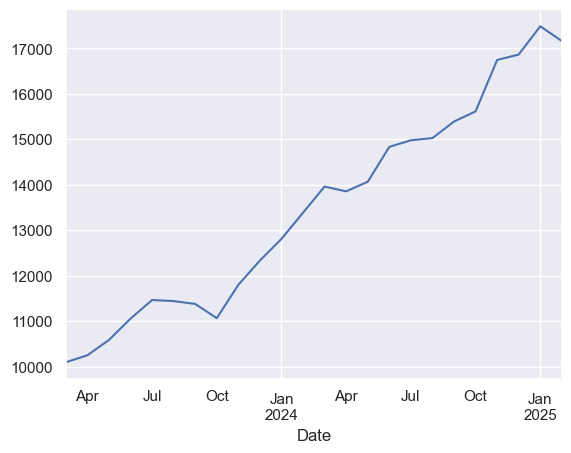

In [ ]:
df_VWCE_ordered['Investment Value'].plot(kind='line')

In [ ]:
#Now some statistics! Sharpe ratio, ROI and CAGR

#CAGR
num_rows = len(df_VWCE_ordered)
CAGR=((df_VWCE_ordered['Investment Value'].iloc[-1]/initial_investment)**0.5)-1
print(CAGR)

0.31007914235106604


In [ ]:
#Return on investment
total_investment=initial_investment+monthly_investment*len(df_VWCE_ordered)
ROI=(df_VWCE_ordered['Investment Value'].iloc[-1]-total_investment)/total_investment*100
print(ROI) #38% of ROI in 2 years! Good one

38.41188380833104


In [ ]:
#Monthly sharpe ratio

mean_return = df_VWCE_ordered['Change %'].mean()
std_deviation = df_VWCE_ordered['Change %'].std()
risk_free_rate = 0.20 #As hypotesis i use German Bund: 2.5%-year
sharpe_ratio_monthly = (mean_return - risk_free_rate) / std_deviation
sharpe_ratio_annualized = sharpe_ratio_monthly * np.sqrt(12)
print(sharpe_ratio_annualized)

#This sharpe ratio suggests we are in a bull market, the stock market performs well even though Bonds have been high cause of BCE and FED interest rate to fight inflation

1.7476680945470908
